<a href="https://colab.research.google.com/github/Tamanna1991/neural-networks/blob/main/lab_3_bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")


In [4]:
len(df)

41188

In [5]:
df.isna().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [8]:
df.drop('duration', inplace=True, axis=1)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])
df['y'].unique()

array([0, 1])

In [10]:
features = ["age", "job", "marital", "education", "default", "housing", "loan",
       "contact", "month", "day_of_week", "campaign", "pdays",
       "previous", "poutcome", "emp.var.rate", "cons.price.idx",
       "cons.conf.idx", "euribor3m", "nr.employed"]


df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [11]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [12]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [14]:
df_dummies_features = pd.get_dummies(df[features])

In [15]:
df_dummies_features.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_dummies_features.info()

In [ ]:
df_dummies_features.columns.values

In [18]:
df_dummies_features.dropna(axis=0,inplace=True)

In [19]:
len(df_dummies_features)

41188

In [ ]:
df_dummies_features.isnull().sum()

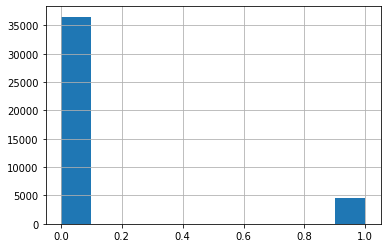

In [21]:
df['y'].hist()

calculating imbalance in the target variable

In [22]:
class_count_0, class_count_1 = df['y'].value_counts()
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (36548, 20)
class 1: (4640, 20)


In [23]:
import imblearn
import collections
from collections import Counter
from sklearn.model_selection import train_test_split

In [24]:
X=df_dummies_features
Y=df['y']

MODELLING THE DATA

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50, stratify=Y)

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [27]:
model = RandomForestClassifier(max_depth=6,n_estimators=150,random_state=60)
model.fit(X_train,y_train)
model_predict=model.predict(X_test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=50, test_size=0.3)
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(x_train, y_train)